In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

suffix = 'ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p96_Theta70'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
#sig_histo2 = util.load(f'{prefix}/signal_BDT_ABCD_goodvtx_v10_NJetG0L3_OSSF.coffea')[0]

## Signal

In [6]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [7]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'theta < 70',
 'BDT']

In [8]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [9]:
table = eff_cutflow
table.columns = cutnames

In [10]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [11]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [12]:
table = cts_cutflow
table.columns = cutnames

In [13]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668,21.3732,10.1356
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829,546.6917,304.2401
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020,689.5404,393.0013
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655,37.1571,20.6126
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555",934.1113,552.6471
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700","1,261.7544",777.7470
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293","9,688.3497","5,126.9630"
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454,629.6533,425.6844
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149,92.0322,59.4500
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,237.3733","2,234.0401","2,160.7601","2,160.7601","2,126.5131","2,065.1446","1,939.5322","1,277.1692"


In [14]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [17]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


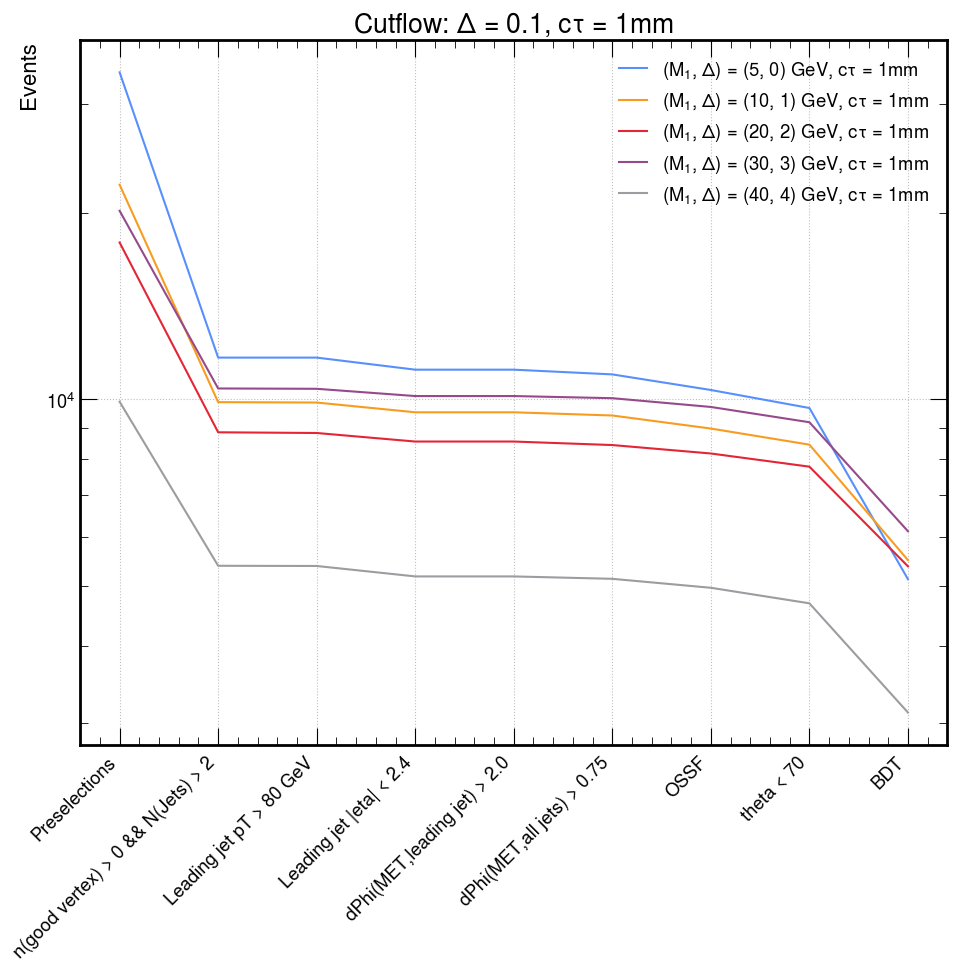

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


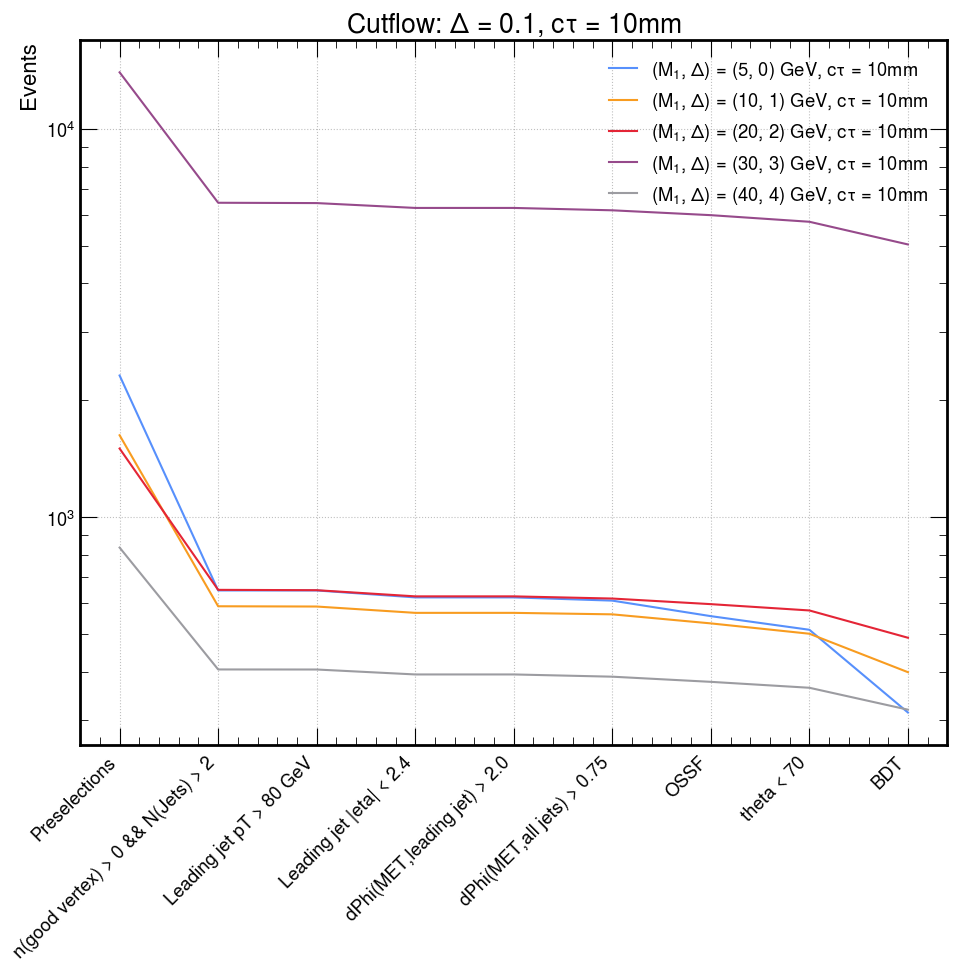

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


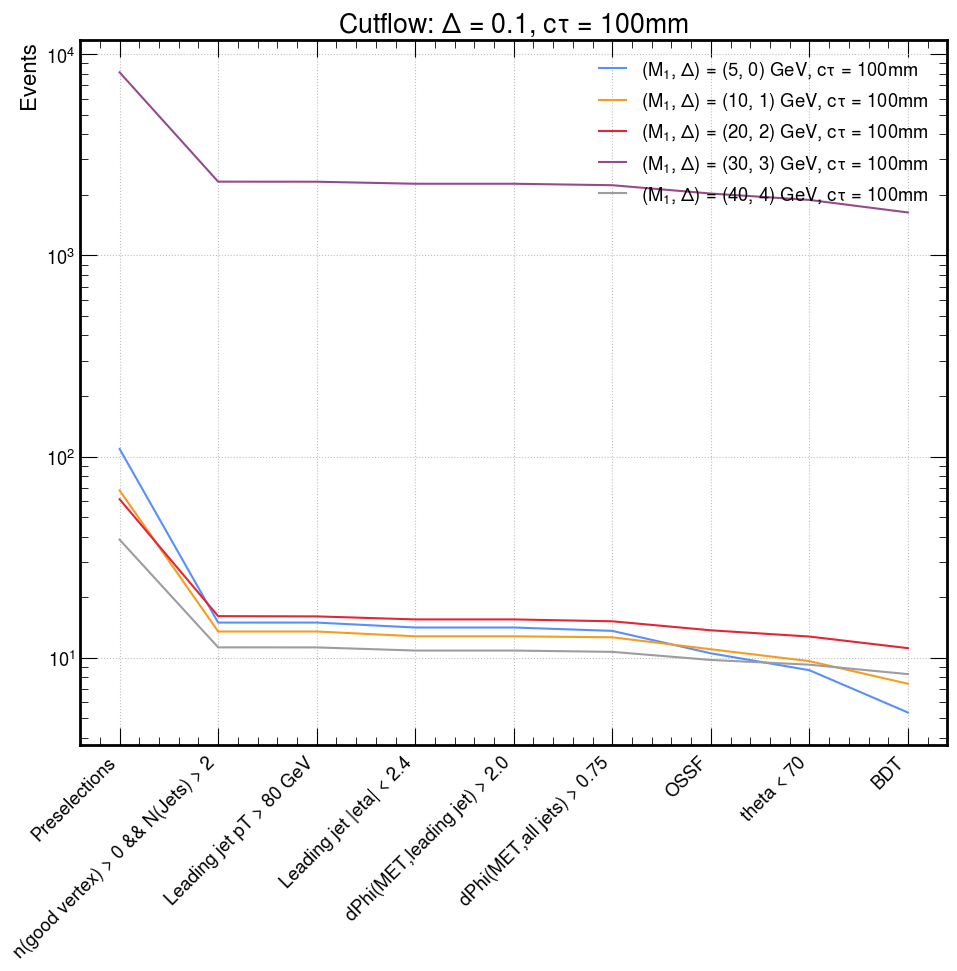

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


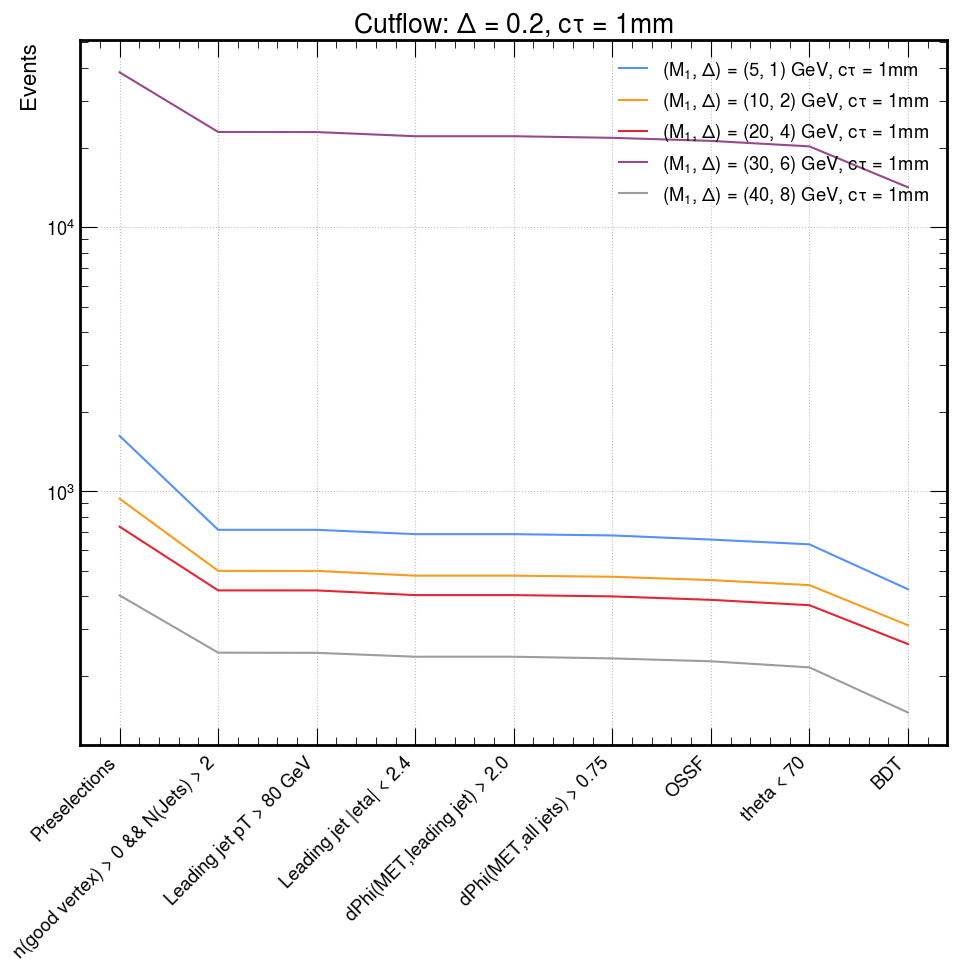

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


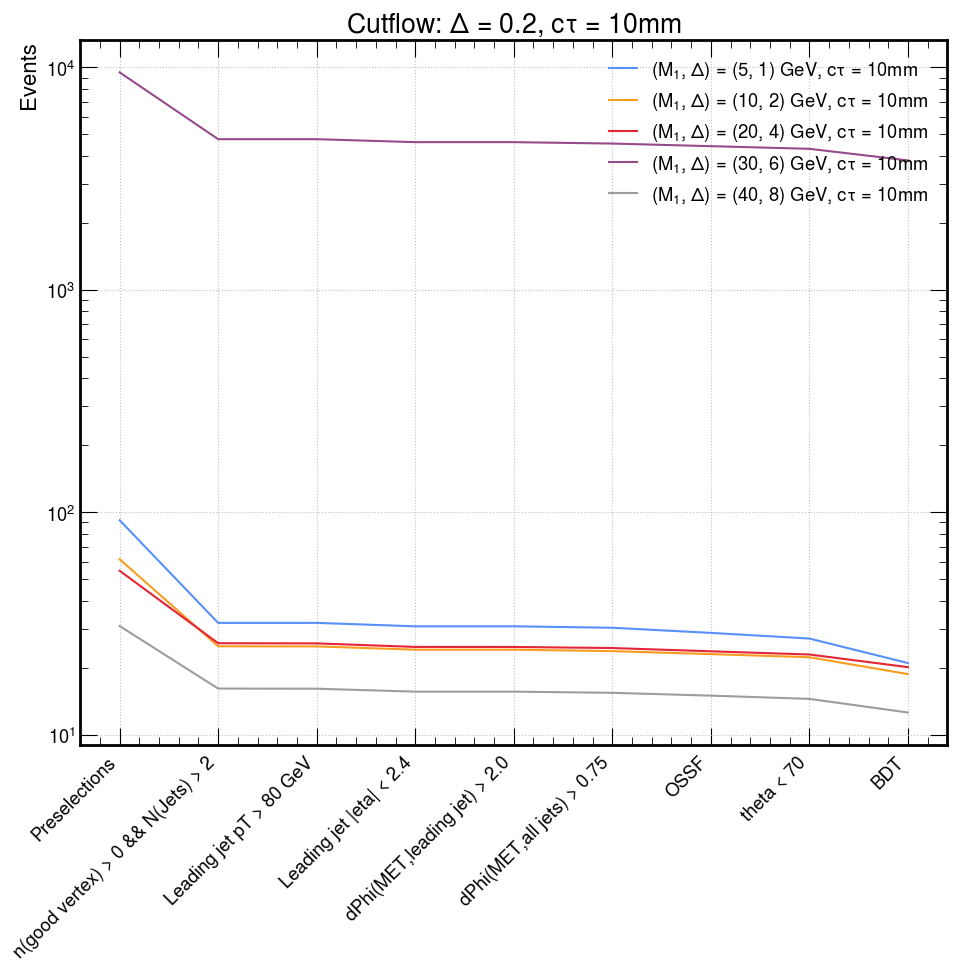

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


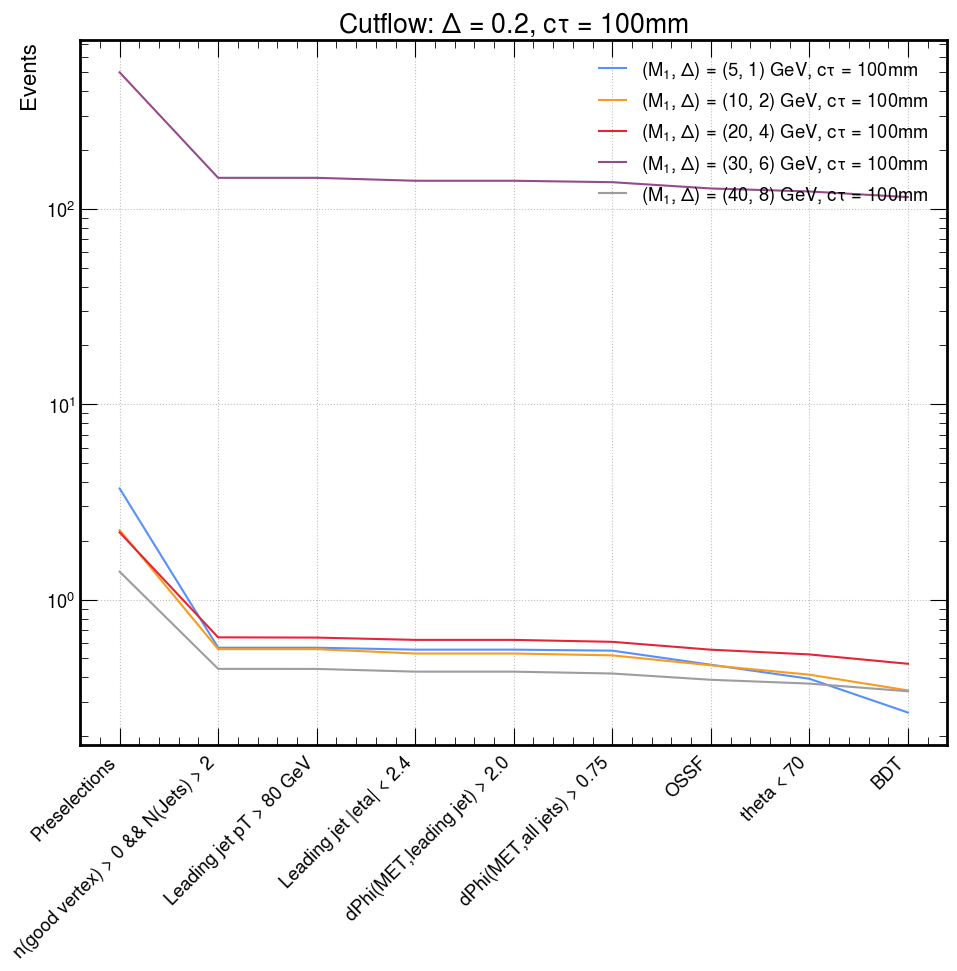

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


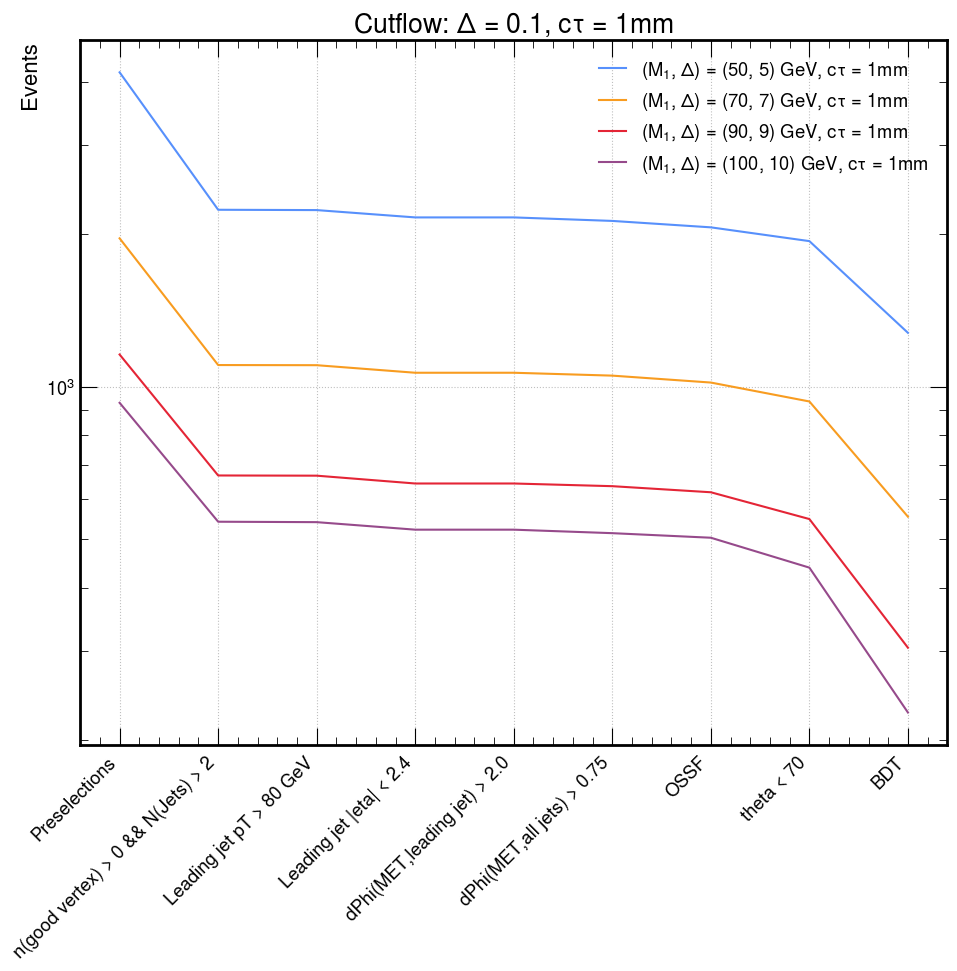

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


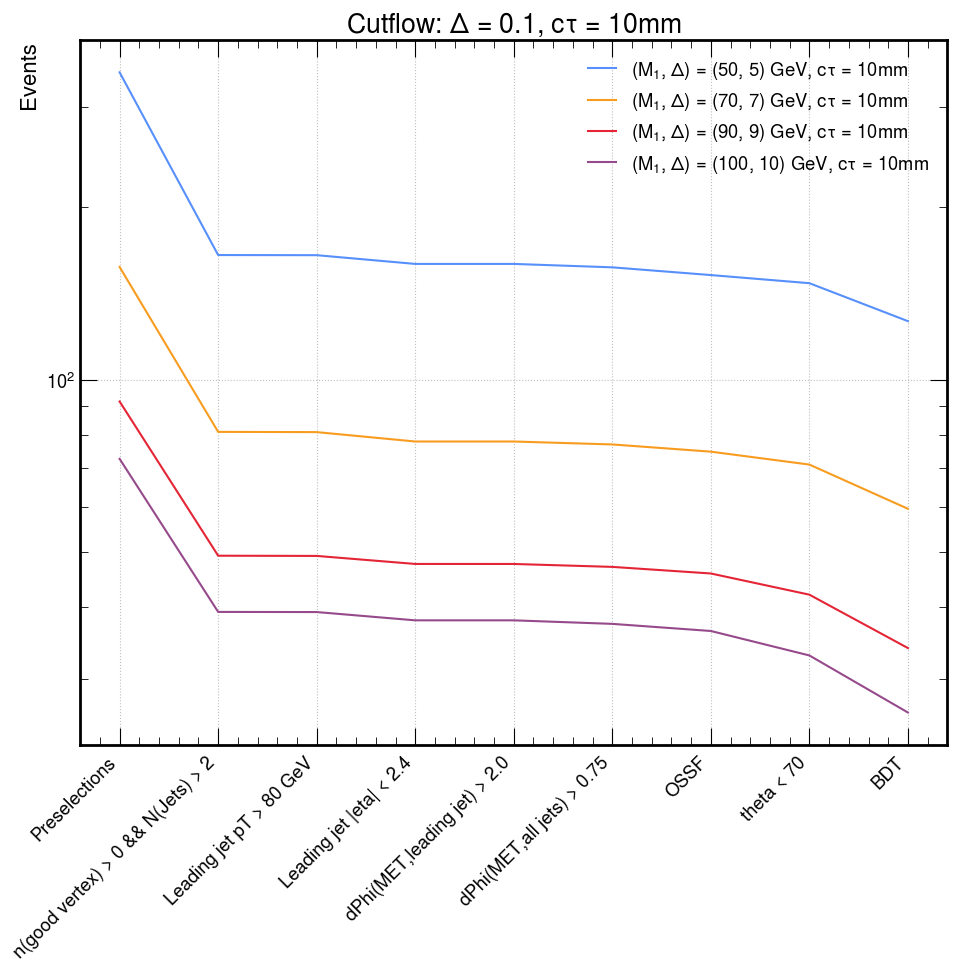

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


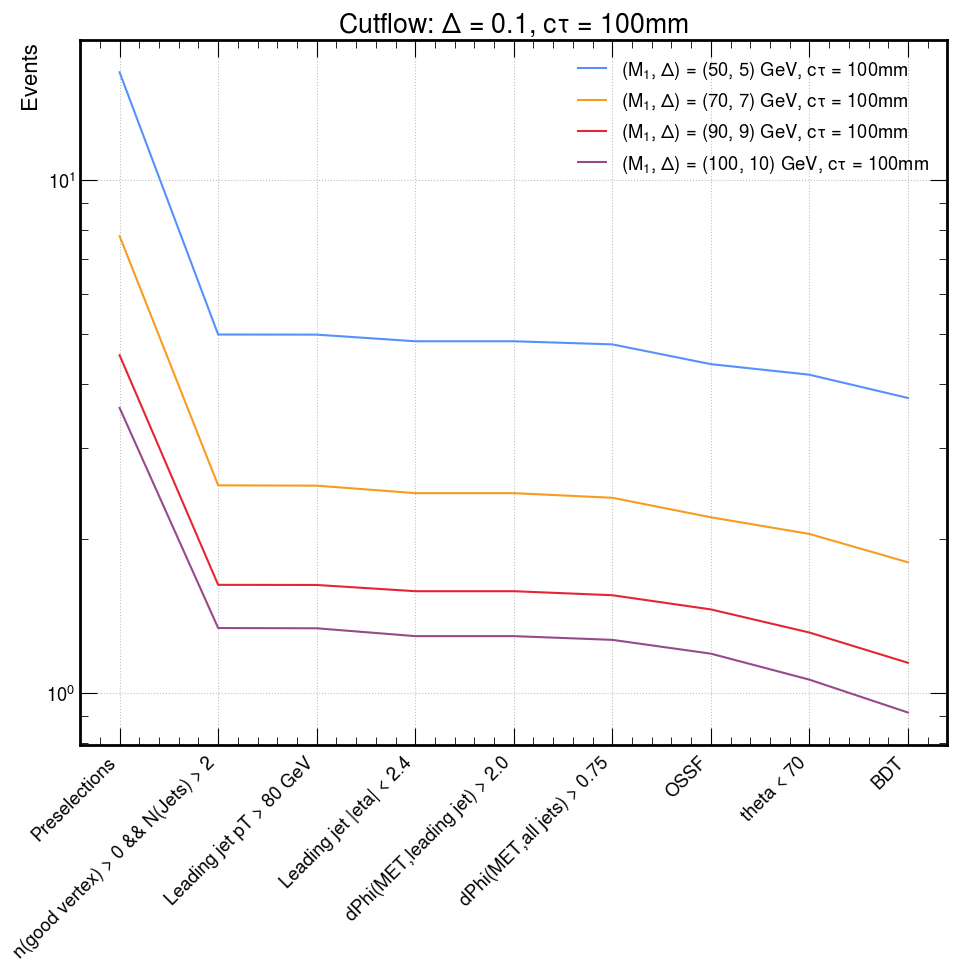

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


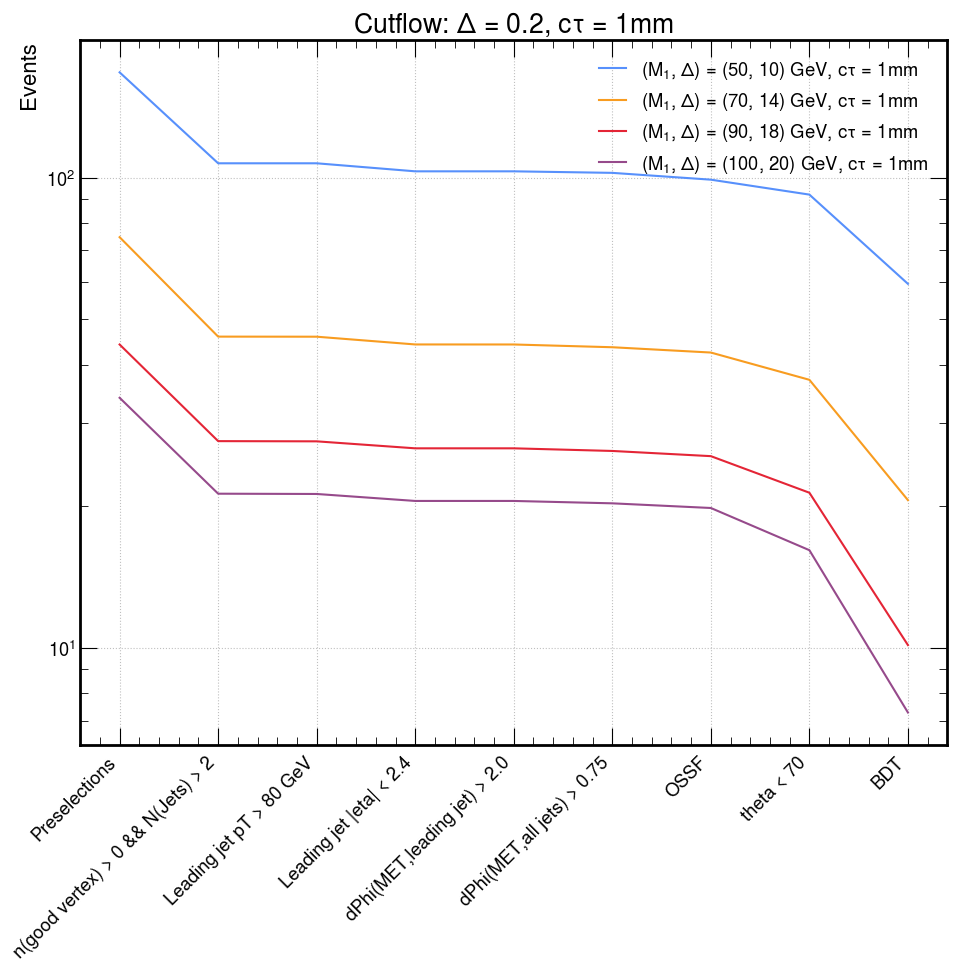

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


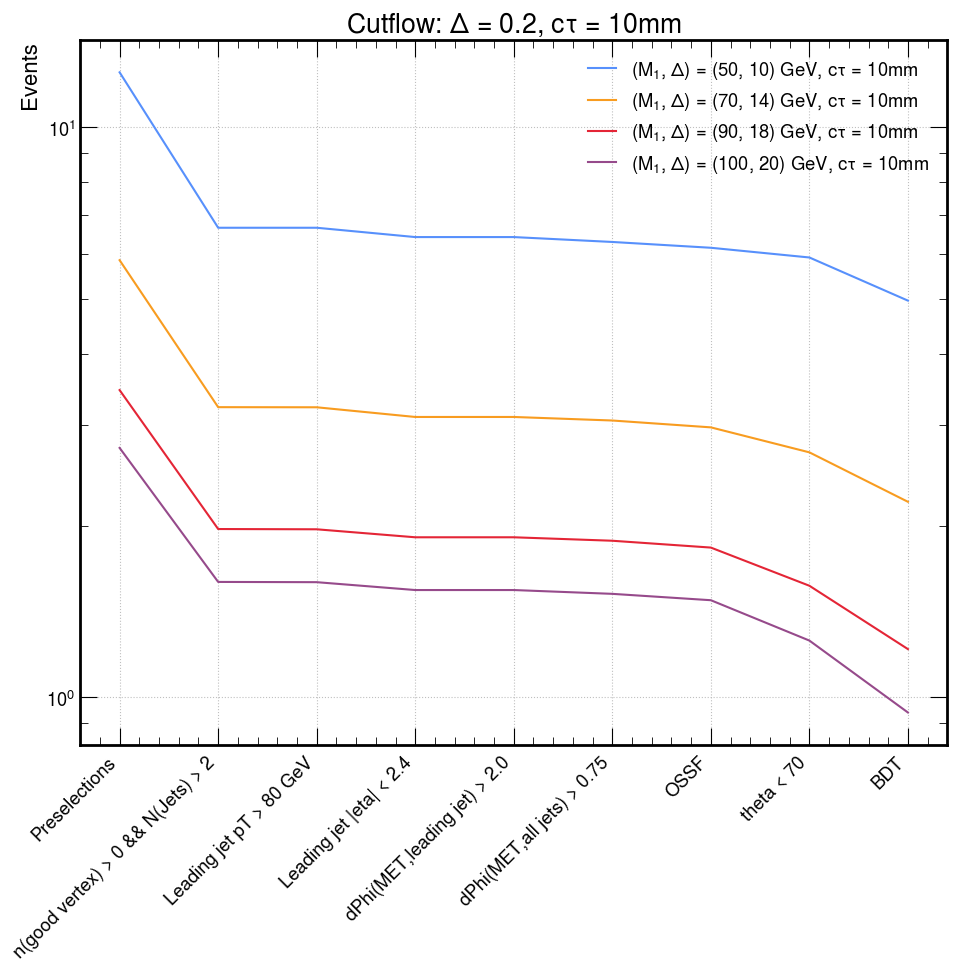

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


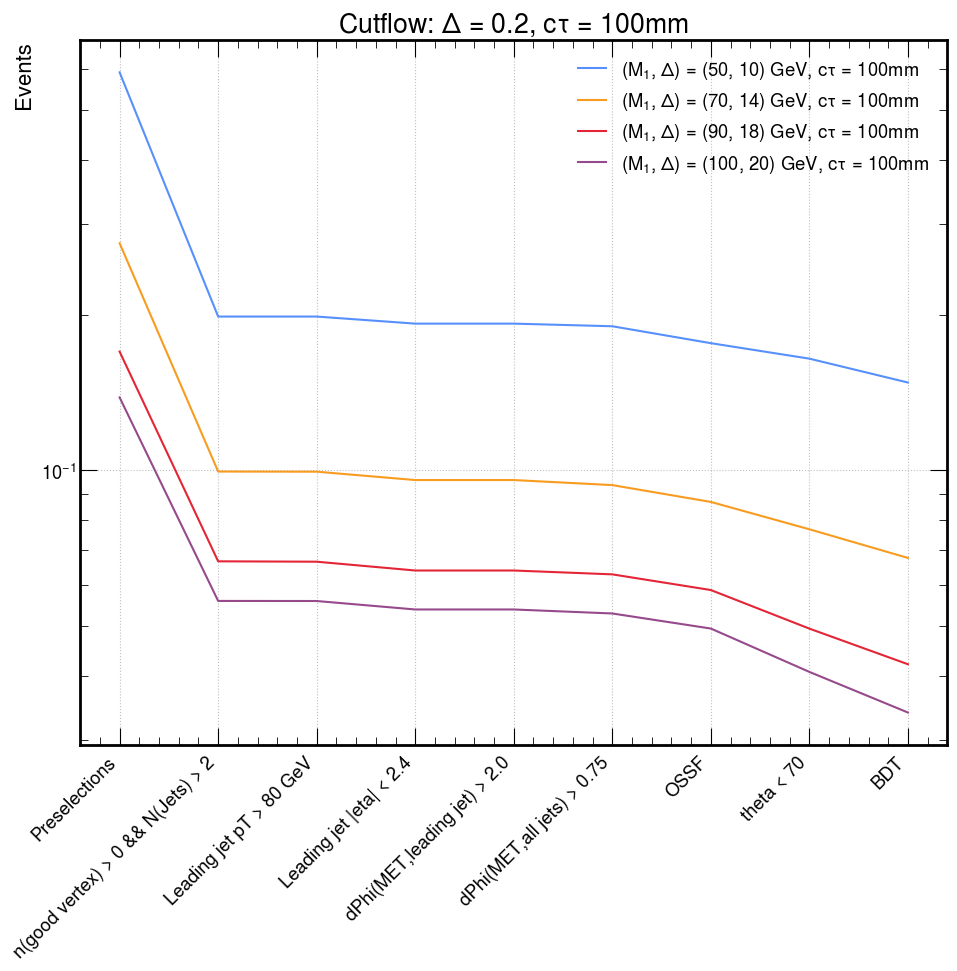

In [19]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

In [20]:
cuts = utils.get_signal_list_of_cuts(sig_histo)

cuts[1] = 'n(good vertex) > 0 && 0 < N(Jets) < 3'
#cuts[2] = 'b-jet veto loose WP'
cuts[2] = r"Leading jet $p_{T} > 80$ GeV"
cuts[3] = r"Leading jet $|\eta| < 2.4$"
cuts[4] = r"$|\Delta\phi(p_{T}^{miss},$leading jet)$| > 2.0$"
cuts[5] = r"min$|\Delta\phi(p_{T}^{miss},$all jets)$| < 0.75$"
cuts[6] = r"SV(ee) OS"
cuts[7] = r"$\theta_{coll} < 1.22$"
cuts[8] = 'BDT score > 0.96'

print(cuts)

['Preselections', 'n(good vertex) > 0 && 0 < N(Jets) < 3', 'Leading jet $p_{T} > 80$ GeV', 'Leading jet $|\\eta| < 2.4$', '$|\\Delta\\phi(p_{T}^{miss},$leading jet)$| > 2.0$', 'min$|\\Delta\\phi(p_{T}^{miss},$all jets)$| < 0.75$', 'SV(ee) OS', '$\\theta_{coll} < 1.22$', 'BDT score > 0.96']


In [21]:
table = cts_cutflow
table.columns = cuts

In [22]:
sig_cdict = {
    '5': "#3f90da", 
    '10': "#ffa90e", 
    '20': "#bd1f01", 
    '30': "#94a4a2", 
    '40': "#832db6", 
    '50': "#a96b59", 
    '60': "#e76300", 
    '70': "#b9ac70", 
    '80': "#717581", 
    '90': "#92dadd",
    '100': "#2ca02c"

}

In [23]:
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (18,13)

NameError: name 'bkg_cts_df' is not defined

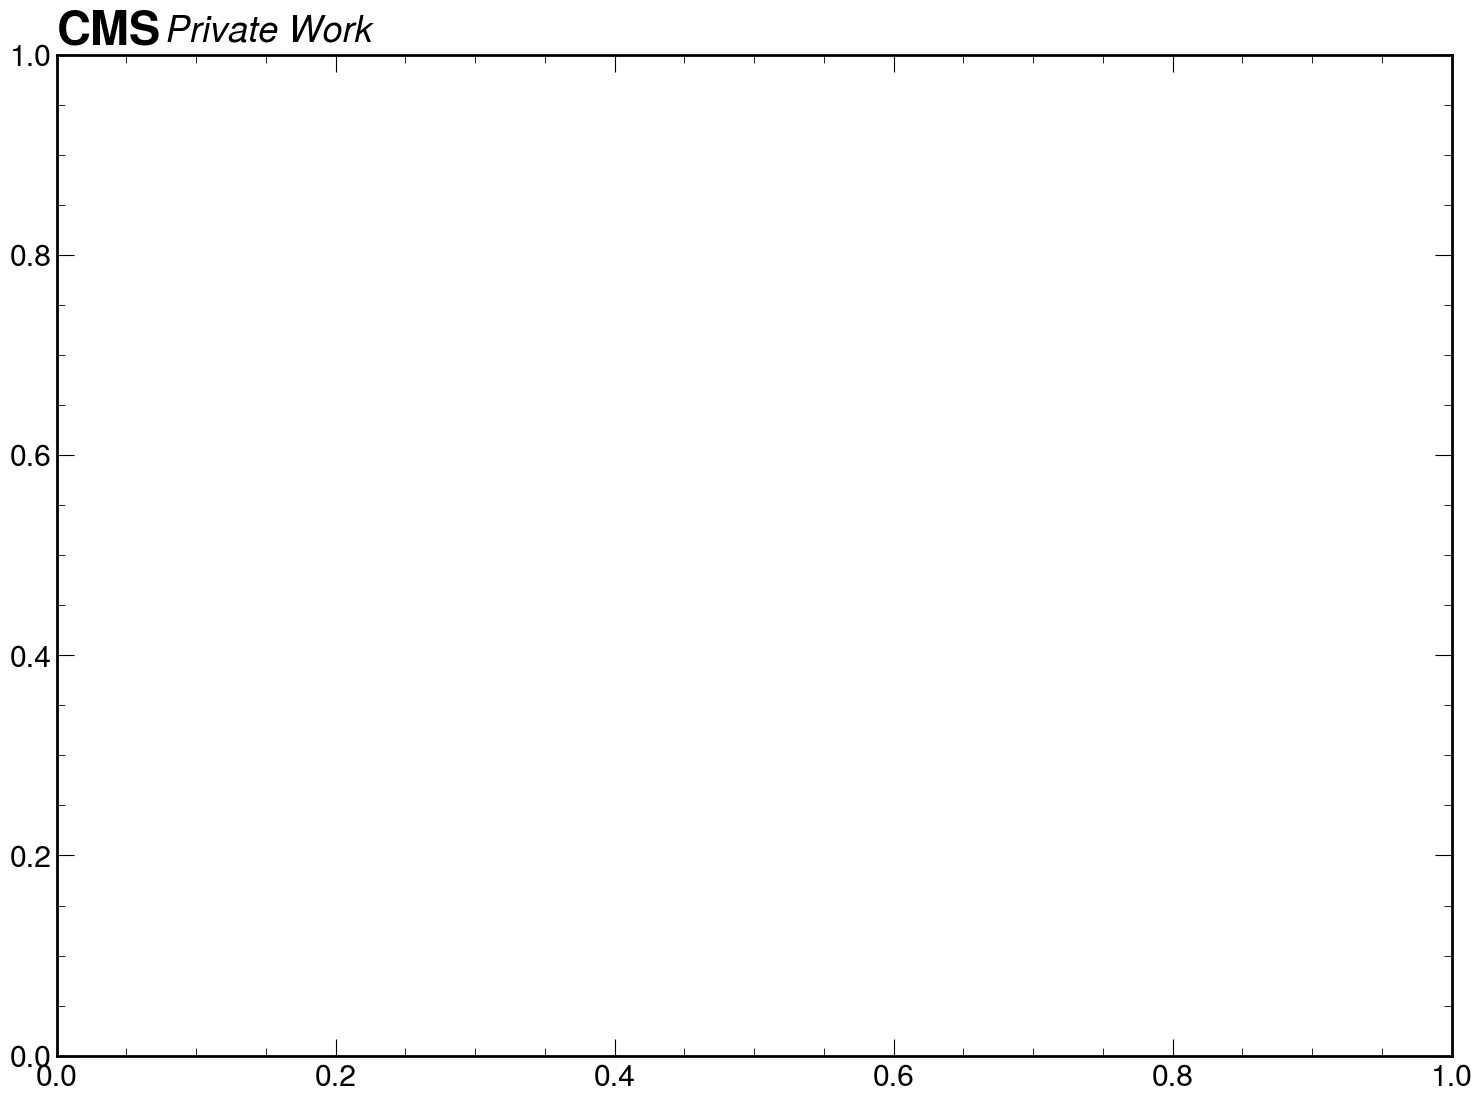

In [24]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 1
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)

m1s = [10, 20, 50, 90]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 in m1s):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=1)


plt.savefig(f'cutflow_SR_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

## Signal purity

In [19]:
purity_v11 = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [20]:
purity_v11_reco = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_fromReco')

In [21]:
ct = 1
delta = 0.1

In [22]:
purity_v11_afterOSSF = {}
purity_v11_afterOSSF_reco = {}

In [57]:
df_all['OSSF']

sig_2018_Mchi-5p5_dMchi-1p0_ctau-100      0.7503
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100     0.8541
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100     0.9082
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100     0.9470
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100     0.9369
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100    0.9428
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100    0.9473
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100    0.9489
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100    0.9502
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100   0.9476
Name: OSSF, dtype: float64

In [77]:
for ct in [1,10,100]:
    for delta in [0.1]:
        points = ((si["ctau"] == ct) & (si['delta'] == delta))
        
        df_all = purity_v11.loc[list(si[points].name)]
        df_all = utils.add_signal_info_to_df(df_all)
        
        df_reco = purity_v11_reco.loc[list(si[points].name)]
        df_reco = utils.add_signal_info_to_df(df_reco)
        
        purity_v11_afterOSSF[f'{delta}_{ct}'] = df_all['OSSF'][(df_all.m1 != 60) & (df_all.m1 != 80)].to_list()
        purity_v11_afterOSSF_reco[f'{delta}_{ct}'] = df_reco['OSSF'][(df_all.m1 != 60) & (df_all.m1 != 80)].to_list()
        
        m_list = df_all['m1'][(df_all.m1 != 60) & (df_all.m1 != 80)].to_list()

In [61]:
df_all['m1'][(df_all.m1 != 60) & (df_all.m1 != 80)]

sig_2018_Mchi-5p5_dMchi-1p0_ctau-100        5.0000
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100      10.0000
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100      20.0000
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100      30.0000
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100      40.0000
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100     50.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100     70.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100     90.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100   100.0000
Name: m1, dtype: float64

In [66]:
m_list

[5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 70.0, 90.0, 100.0]

In [68]:
purity_v11_afterOSSF['0.2_1']

[0.9594603776931763,
 0.9738323092460632,
 0.9791244864463806,
 0.9722358584403992,
 0.9741947054862976,
 0.9765380620956421,
 0.9753269553184509,
 0.9687197804450989,
 0.9708550572395325]

In [69]:
purity_v11_afterOSSF['0.2_10']

[0.9204937815666199,
 0.9567110538482666,
 0.9678841829299927,
 0.9691239595413208,
 0.9694084525108337,
 0.9738131761550903,
 0.9703822135925293,
 0.9715356230735779,
 0.9736980199813843]

In [ ]:
'#1f77b4', '#ff7f0e', '#2ca02c',

In [26]:
import mplhep as hep
hep.style.use("CMS")
plt.rcParams["figure.figsize"] = (12,10)

import matplotlib.patches as mpatches

In [ ]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

#fig, ax = plt.subplots()
plt.plot(m_list, 0.01*(1-np.array(purity_v11_afterOSSF_reco['0.1_1'])), '-', color='black', label='No Matched Good Vtx')
plt.plot(m_list, 0.01*(1-np.array(purity_v11_afterOSSF_reco['0.1_1'])), '--', color='black', label='Match Exists, Unselected')
plt.plot(m_list, 0.01*(1-np.array(purity_v11_afterOSSF_reco['0.1_1'])), '--', color='white', label=' ')


plt.plot(m_list, 100*(1-np.array(purity_v11_afterOSSF['0.1_1'])), '-', label=r"c$\tau$=1mm", color='#1f77b4')
plt.plot(m_list, 100*(1-np.array(purity_v11_afterOSSF_reco['0.1_1'])), '--', color='#1f77b4')

plt.plot(m_list, 100*(1-np.array(purity_v11_afterOSSF['0.1_10'])), '-', label=r"c$\tau$=10mm", color='#ff7f0e')
plt.plot(m_list, 100*(1-np.array(purity_v11_afterOSSF_reco['0.1_10'])), '--', color='#ff7f0e')

plt.plot(m_list, 100*(1-np.array(purity_v11_afterOSSF['0.1_100'])), '-', label=r"c$\tau$=100mm", color='#2ca02c')
plt.plot(m_list, 100*(1-np.array(purity_v11_afterOSSF_reco['0.1_100'])), '--', color='#2ca02c')

plt.grid()

plt.ylim([1e-1, 1e+2])

plt.yscale('log')

plt.xlabel(r"$m_{1}$ [GeV]")
plt.ylabel('Percentage of Events')

'''
extraString = 'No Matched Good Vtx'
extraString2 = 'Match Exists, Unselected'
extraString3 = ' '
handles, labels = ax.get_legend_handles_labels()
handles.append(mpatches.Patch(color='grey', label=extraString))
handles.append(mpatches.Patch(color='grey', label=extraString2))
handles.append(mpatches.Patch(color='none', label=extraString3))


new_handles = []
new_handles.append(handles[3])
new_handles.append(handles[4])
new_handles.append(handles[5])
new_handles.append(handles[0])
new_handles.append(handles[1])
new_handles.append(handles[2])

plt.legend(handles=new_handles, ncol=2)
'''
plt.legend(ncol=2)

plt.title(rf"{int(delta*100)}% splitting", position=(0.85, 0.5))

plt.savefig(f'vertex_selection_ineff_delta0p1.pdf', bbox_inches = "tight")

In [22]:
purity_v10 = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched')

NameError: name 'sig_histo2' is not defined

In [ ]:
purity_v10_reco = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched_fromReco')

In [ ]:
ct = 10
delta = 0.2

In [ ]:
table = purity_v11

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [26]:
table = purity_v10

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

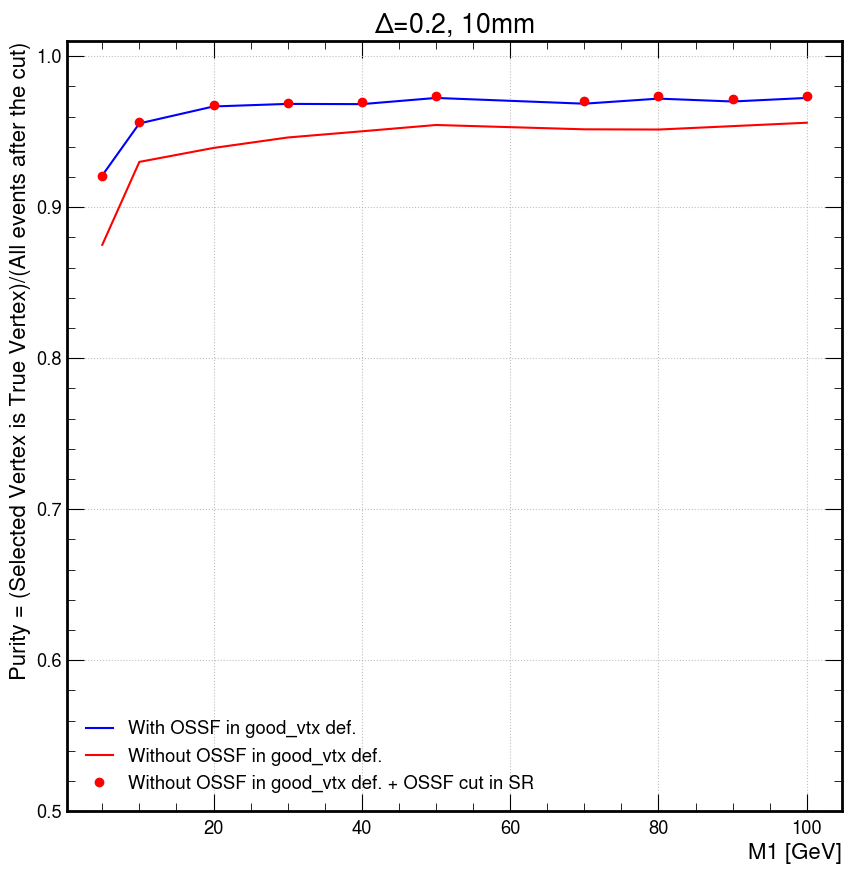

In [27]:
plt.plot(m_list, purity_v10_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')


plt.grid()
plt.ylim([0.5,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(All events after the cut)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

In [28]:
table = purity_v11_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [29]:
table = purity_v10_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

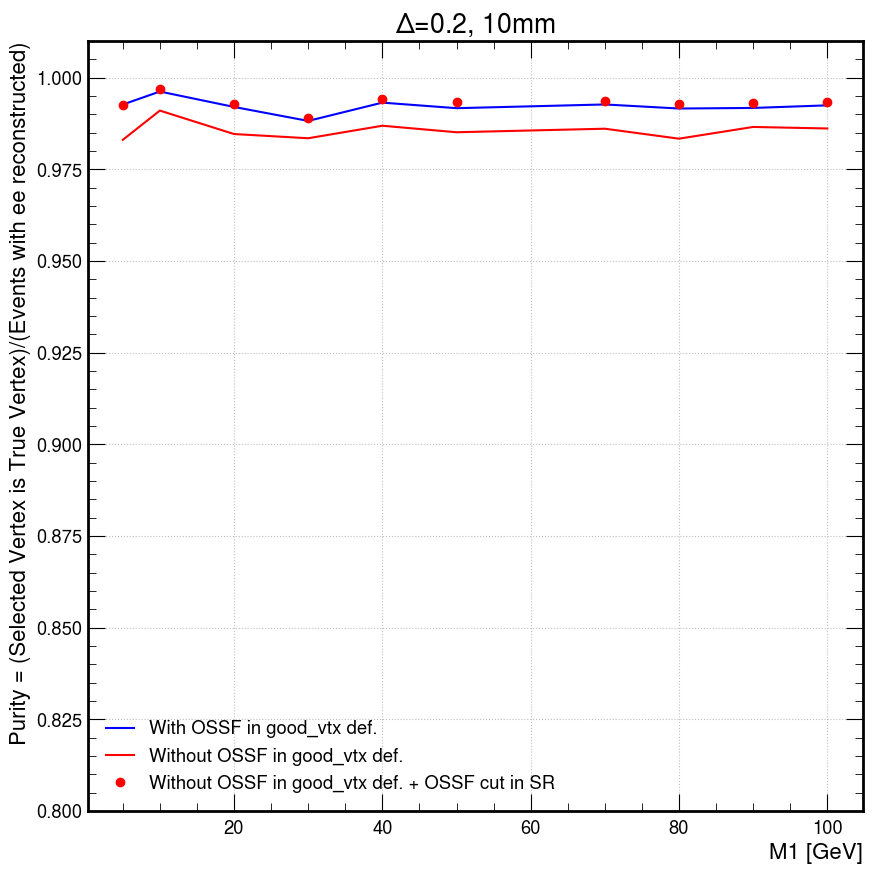

In [30]:
plt.plot(m_list, purity_v10_reco_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')

plt.grid()
plt.ylim([0.8,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(Events with ee reconstructed)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

## Background

In [27]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
WJets,0.00101318,0.00003720,0.00003665,0.00003480,0.00003459,0.00003180,0.00001672,0.00000771,0.00000010
DY,0.00018701,0.00001151,0.00001141,0.00001094,0.00001083,0.00000952,0.00000760,0.00000367,0.00000007
ZJets,0.00242159,0.00007613,0.00007541,0.00007141,0.00007118,0.00006654,0.00003517,0.00001608,0.00000030
Multiboson,0.00065832,0.00003441,0.00003004,0.00002763,0.00002678,0.00002517,0.00001774,0.00000721,0.00000000
Top,0.00039885,0.00001298,0.00001210,0.00001090,0.00001077,0.00000985,0.00000627,0.00000294,0.00000005
ZGamma,0.00032468,0.00001653,0.00001398,0.00001313,0.00001310,0.00001314,0.00000881,0.00000478,0.00000000
QCD,0.00000249,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000
Total,0.00001696,0.00000054,0.00000052,0.00000049,0.00000049,0.00000044,0.00000024,0.00000011,0.00000000


In [28]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p96_Theta70/Cutflow/Efficiency//Background_Efficiency.csv


In [29]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
WJets,"214,692.24","7,883.42","7,765.40","7,373.78","7,330.01","6,739.24","3,542.39","1,633.62",21.14
DY,"5,819.49",358.21,355.08,340.58,337.02,296.39,236.56,114.17,2.13
ZJets,"63,745.58","2,003.91","1,985.06","1,879.87","1,873.73","1,751.69",925.74,423.19,7.82
Multiboson,"4,588.16",239.80,209.34,192.59,186.67,175.45,123.66,50.25,0.00
Top,"26,174.93",851.60,793.75,715.64,706.97,646.17,411.66,192.83,3.48
ZGamma,"1,665.13",84.77,71.71,67.31,67.20,67.41,45.16,24.51,0.00
QCD,"53,432.27",275.55,275.55,214.93,206.03,32.90,16.05,0.00,0.00
Total,"370,117.80","11,697.26","11,455.88","10,784.71","10,707.63","9,709.25","5,301.23","2,438.56",34.56


In [30]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p96_Theta70/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [31]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
WJets,1177020,21199,20944,20158,19793,16850,8815,4106,54
DY,296131,7134,7103,6985,6640,4563,3734,1802,37
ZJets,738994,12563,12452,11965,11824,10144,5327,2436,49
Multiboson,25187,1310,1106,1027,966,905,641,254,0
Top,703976,21950,20178,18131,17729,16114,10382,4845,77
ZGamma,6506,343,307,292,279,252,158,75,0
QCD,31490,92,92,90,88,6,2,0,0
Total,2979304,64591,62182,58648,57319,48834,29059,13518,217


In [32]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
WJets,1177020,21199,20944,20158,19793,16850,8815,4106,54
DY,296131,7134,7103,6985,6640,4563,3734,1802,37
ZJets,738994,12563,12452,11965,11824,10144,5327,2436,49
Multiboson,25187,1310,1106,1027,966,905,641,254,0
Top,703976,21950,20178,18131,17729,16114,10382,4845,77
ZGamma,6506,343,307,292,279,252,158,75,0
QCD,31490,92,92,90,88,6,2,0,0
Total,2979304,64591,62182,58648,57319,48834,29059,13518,217


In [33]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p96_Theta70/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [34]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 34.56


In [31]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZGamma,WJets,Top,QCD,Multiboson,DY,ZJets,Total
Weighted Counts,0.00,21.14,3.48,0.00,0.00,2.13,7.82,34.56
Raw Counts,0.00,54.00,77.00,0.00,0.00,37.00,49.00,217.00


In [32]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZGamma,WJets,Top,QCD,Multiboson,DY,ZJets,Total
Weighted Counts,45.16,"3,542.39",411.66,16.05,123.66,236.56,925.74,"5,301.23"
Raw Counts,158.00,"8,815.00","10,382.00",2.00,641.00,"3,734.00","5,327.00","29,059.00"


In [33]:
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (18,13)

In [34]:
cuts = utils.get_signal_list_of_cuts(sig_histo)

cuts[1] = 'n(good vertex) > 0 && 0 < N(Jets) < 3'
#cuts[2] = 'b-jet veto loose WP'
cuts[2] = r"Leading jet $p_{T} > 80$ GeV"
cuts[3] = r"Leading jet $|\eta| < 2.4$"
cuts[4] = r"$|\Delta\phi(p_{T}^{miss},$leading jet)$| > 2.0$"
cuts[5] = r"min$|\Delta\phi(p_{T}^{miss},$all jets)$| < 0.75$"
cuts[6] = r"SV(ee) OS"
cuts[7] = r"$\theta_{coll} < 70$"
cuts[8] = r"BDT score $> 0.96$"

print(cuts)

['Preselections', 'n(good vertex) > 0 && 0 < N(Jets) < 3', 'Leading jet $p_{T} > 80$ GeV', 'Leading jet $|\\eta| < 2.4$', '$|\\Delta\\phi(p_{T}^{miss},$leading jet)$| > 2.0$', 'min$|\\Delta\\phi(p_{T}^{miss},$all jets)$| < 0.75$', 'SV(ee) OS', '$\\theta_{coll} < 70$', 'BDT score $> 0.96$']


In [35]:
sig_cdict = {
    '5': "#3f90da", 
    '10': "#ffa90e", 
    '20': "#bd1f01", 
    '30': "#94a4a2", 
    '40': "#832db6", 
    '50': "#a96b59", 
    '60': "#e76300", 
    '70': "#b9ac70", 
    '80': "#717581", 
    '90': "#92dadd",
    '100': "#2ca02c"

}

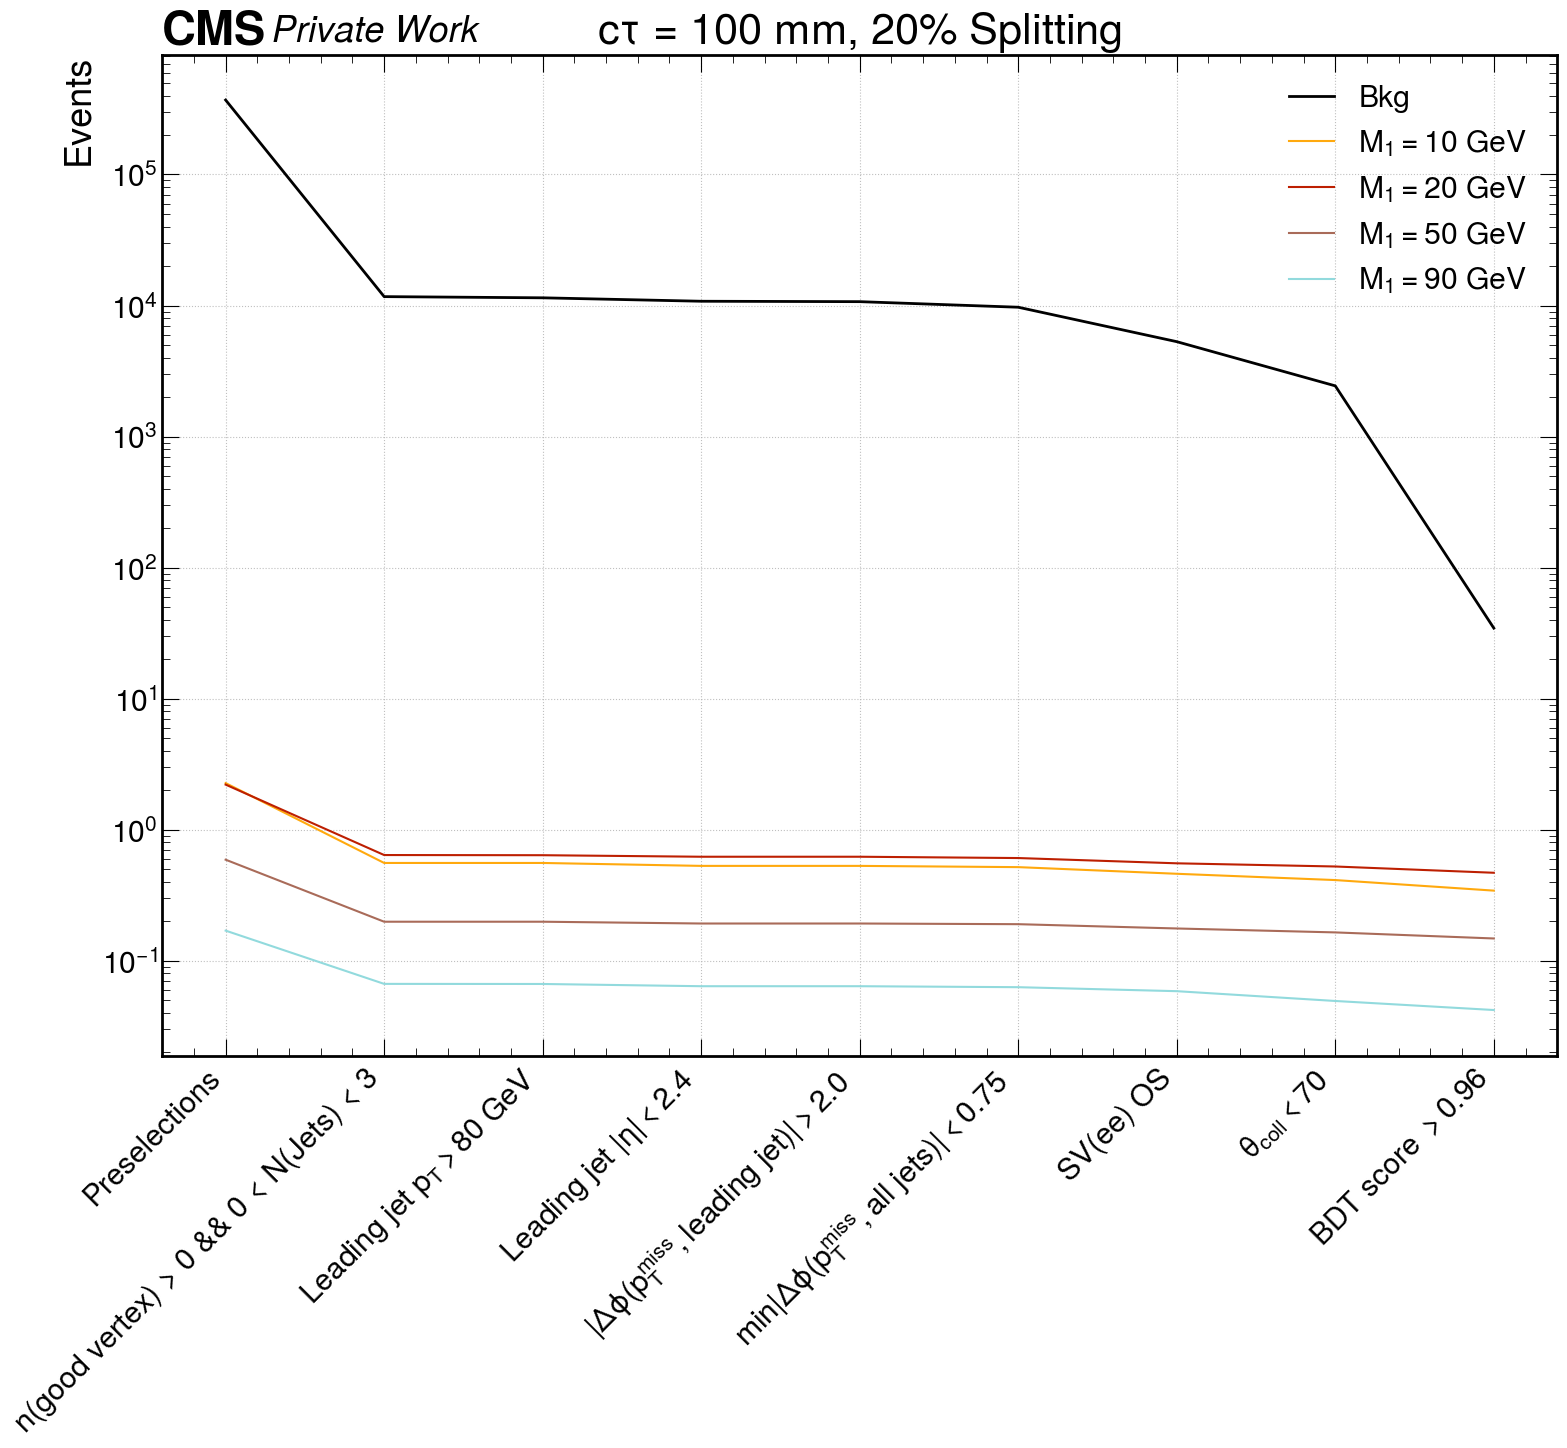

In [36]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 100
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)

m1s = [10, 20, 50, 90]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 in m1s):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=1)


plt.savefig(f'cutflow_SR_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

Saved: ./plots/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p96_Theta70/cutflow//Cutflow_background.png


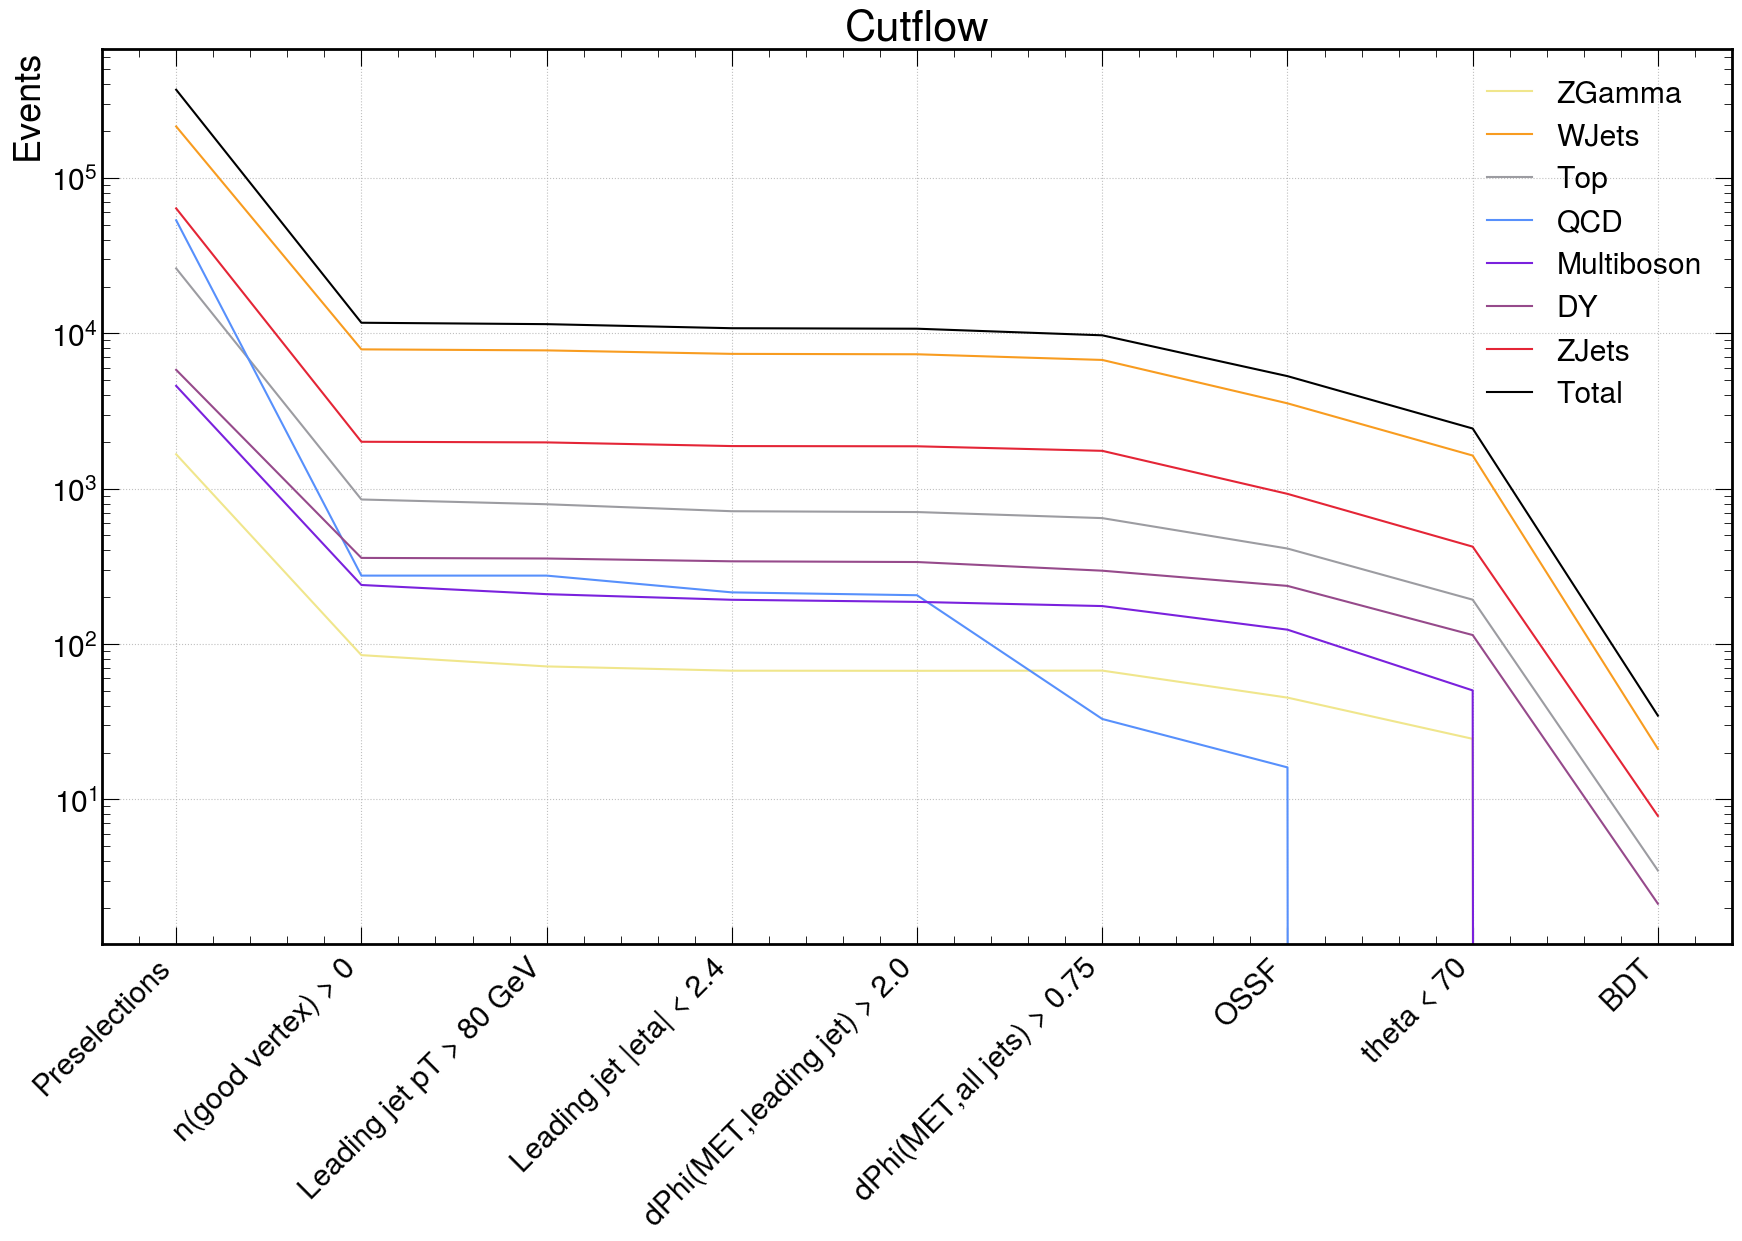

In [37]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p96_Theta70/cutflow//Cutflow_background.png


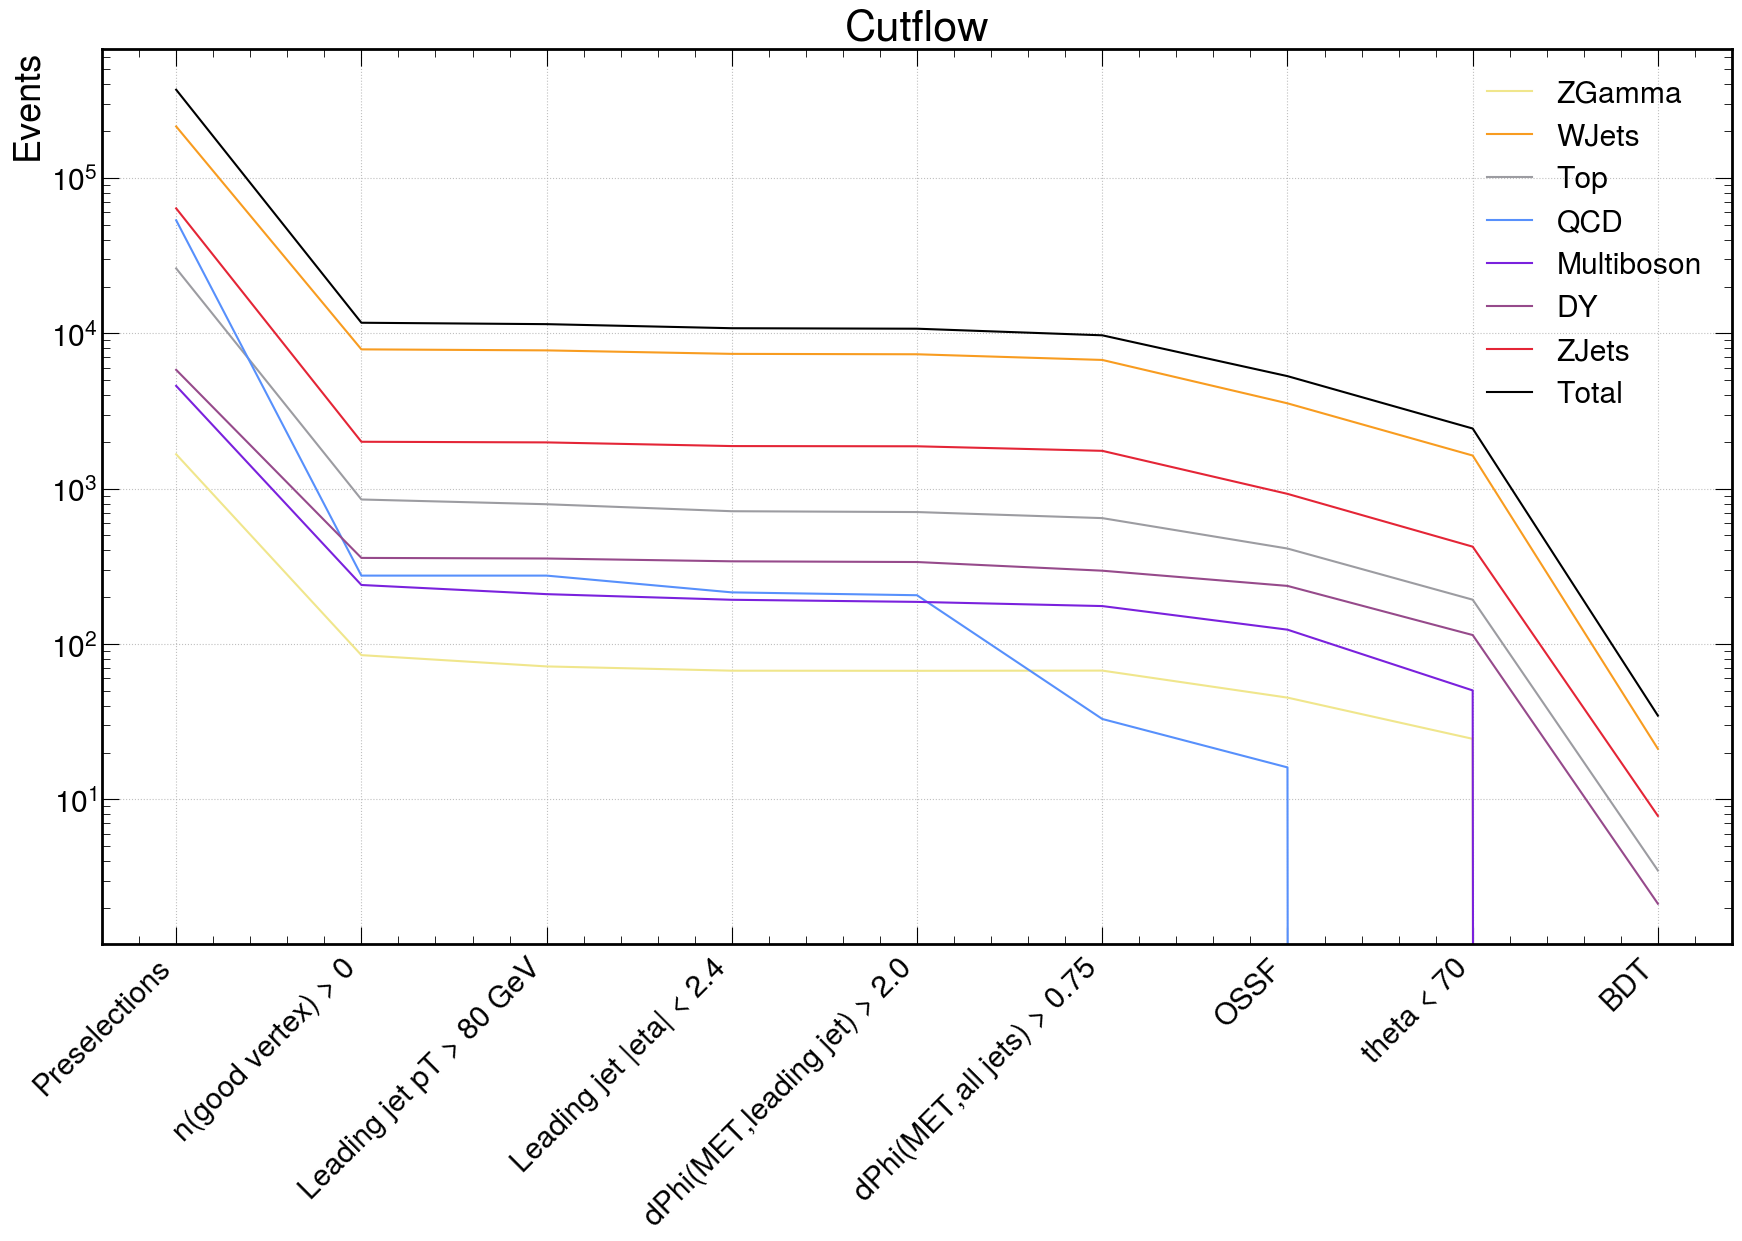

In [38]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [58]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

34.5648639628083

In [59]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [60]:
pd.options.display.float_format = '{:,.4f}'.format


In [61]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,313.8231,5.0000,0.1000,10.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,425.6844,5.0000,0.2000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.3399,5.0000,0.1000,100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"5,126.9630",5.0000,0.1000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,21.0042,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.9161,100.0000,0.1000,100.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.0339,100.0000,0.2000,100.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,26.1934,100.0000,0.1000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.9402,100.0000,0.2000,10.0000


In [62]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [63]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,313.8231,34.5649,53.3786
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,425.6844,34.5649,72.4053
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,5.3399,34.5649,0.9083
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"5,126.9630",34.5649,872.0528
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,21.0042,34.5649,3.5726
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,100.0000,0.2000,100.0000,0.0339,34.5649,0.0058
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,26.1934,34.5649,4.4553
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,100.0000,0.2000,10.0000,0.9402,34.5649,0.1599
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,7.2853,34.5649,1.2392


In [65]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [66]:
ct = 1.0


In [67]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"5,126.9630",34.5649,872.0528
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"5,503.0723",34.5649,936.0257
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"5,377.2918",34.5649,914.6316
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"6,126.8900",34.5649,"1,042.1318"
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"3,121.6015",34.5649,530.9578
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"1,277.1692",34.5649,217.2356
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,777.7470,34.5649,132.2881
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,552.6471,34.5649,94.0006
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,393.0013,34.5649,66.8462
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,304.2401,34.5649,51.7486


In [48]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,425.6844,34.5649,72.4053
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,311.0356,34.5649,52.9045
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,263.9608,34.5649,44.8975
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"14,146.2008",34.5649,"2,406.1483"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,145.3536,34.5649,24.7234
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,59.4500,34.5649,10.1119
62,60.0,0.2,1.0,0.0000,34.5649,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,20.6126,34.5649,3.5060
65,80.0,0.2,1.0,0.0000,34.5649,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,10.1356,34.5649,1.7240


In [68]:
ct = 10.0


In [69]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,313.8231,34.5649,53.3786
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,398.6352,34.5649,67.8044
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,488.9937,34.5649,83.1737
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"5,042.6110",34.5649,857.7052
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,319.1430,34.5649,54.2835
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,126.5679,34.5649,21.5281
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,81.7568,34.5649,13.9061
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,59.4745,34.5649,10.1161
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,43.9577,34.5649,7.4768
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,33.9501,34.5649,5.7746


In [70]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,21.0042,34.5649,3.5726
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,18.7330,34.5649,3.1863
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,20.1271,34.5649,3.4234
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"3,819.3242",34.5649,649.6345
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,12.5864,34.5649,2.1408
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,4.9629,34.5649,0.8441
63,60.0,0.2,10.0,0.0000,34.5649,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.2021,34.5649,0.3746
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.5804,34.5649,0.2688
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.2146,34.5649,0.2066


In [52]:
ct = 100.0


In [53]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,5.3399,34.5649,0.9083
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,7.4205,34.5649,1.2622
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,11.1545,34.5649,1.8973
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,634.9888",34.5649,278.0977
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,8.2841,34.5649,1.4091
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.7576,34.5649,0.6391
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.5245,34.5649,0.4294
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.7976,34.5649,0.3058
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.4249,34.5649,0.2424
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.1451,34.5649,0.1948


In [54]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.2644,34.5649,0.0450
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.3431,34.5649,0.0584
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4696,34.5649,0.0799
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,114.8690,34.5649,19.5382
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3395,34.5649,0.0578
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1480,34.5649,0.0252
64,60.0,0.2,100.0,0.0000,34.5649,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0677,34.5649,0.0115
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0571,34.5649,0.0097
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0421,34.5649,0.0072
